In [1]:
import pandas as pd

In [8]:
loan=pd.read_csv('C:/Users/mkatiyar/Documents/Personal/coursera/74581_169310_bundle_archive/loan_data_set.csv')

In [61]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
loan.loc[2,'LoanAmount']=None

In [57]:
import matplotlib.pyplot as plt

In [58]:
import seaborn as sns

In [62]:
missing_values = ["n/a", "na", "--","None"]
loan= pd.read_csv("C:/Users/mkatiyar/Documents/Personal/coursera/74581_169310_bundle_archive/loan_data_set.csv", na_values = missing_values)

In [63]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
loan.shape

(614, 13)

In [70]:
total = loan.isnull().sum().sort_values(ascending=False)
percent = (loan.isnull().sum()/loan.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [72]:
loan['Gender'] = loan['Gender'].fillna(loan['Gender'].dropna().mode().values[0] )

In [93]:
loan['Gender'].dropna().mode()[0]

'Male'

In [87]:
loan['Gender'].shape

(614,)

In [97]:
for column in ['Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']:
    loan[column].fillna(loan[column].dropna().mode().values[0],inplace=True)

In [109]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [108]:
loan['LoanAmount'] = loan['LoanAmount'].fillna(
loan['LoanAmount'].dropna().median() )

In [99]:
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C86C8AC550>]],
      dtype=object)

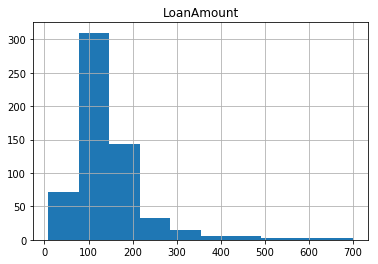

In [106]:
loan.hist('LoanAmount')

In [110]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [112]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

In [113]:
loan = loan.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [114]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,2,0,1,2,5849,0.0,128.0,360.0,1.0,3,1
1,LP001003,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1


In [115]:
loan.drop('Loan_ID', axis = 1, inplace = True)

In [116]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,128.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1


In [118]:
loan['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [119]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 57.6+ KB


In [120]:
loan["Dependents"]=loan["Dependents"].astype("int")

In [123]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int32
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int32(1), int64(7)
memory usage: 55.2 KB


In [122]:
loan['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

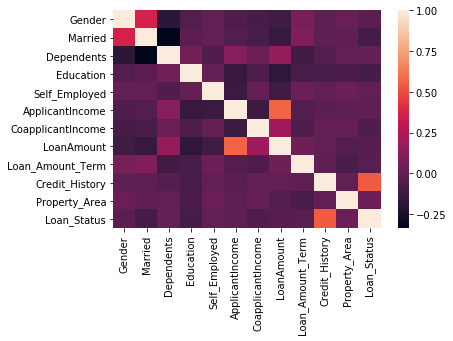

In [124]:
sns.heatmap(loan.corr())

In [125]:
y = loan['Loan_Status']
X = loan.drop('Loan_Status', axis = 1)

In [131]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,128.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

C:\Users\mkatiyar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [138]:
X_train.shape

(491, 11)

In [139]:
model = LogisticRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.8979591836734695

In [140]:
tree=DecisionTreeClassifier()

In [141]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [142]:
ypred_tree=tree.predict(X_test)
evaluation = f1_score(y_test, ypred_tree)
evaluation

0.75

In [144]:
from sklearn.svm import SVC

In [145]:
svm=SVC()

In [146]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [147]:
svm_pred=svm.predict(X_test)

In [149]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,svm_pred)

array([[ 1, 32],
       [ 0, 90]], dtype=int64)

In [150]:
classification_report(y_test, svm_pred)

'             precision    recall  f1-score   support\n\n          0       1.00      0.03      0.06        33\n          1       0.74      1.00      0.85        90\n\navg / total       0.81      0.74      0.64       123\n'

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
knn = KNeighborsClassifier(n_neighbors=7)

In [153]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [156]:
y_pred_knn = knn.predict(X_test)

In [157]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy: 0.6422764227642277


In [159]:
evaluation = f1_score(y_test, y_pred_knn)
evaluation

0.7708333333333334